# In this notebook we will use Pearson Correlation and KNN to recommend books.

## This is a Book Recommender System using Pearson Correlation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
books = pd.read_csv("BX-Books.csv", encoding='latin-1', sep=";", on_bad_lines='skip')
user = pd.read_csv("BX-Users.csv", encoding='latin-1', sep=";", on_bad_lines='skip')
rating = pd.read_csv("BX-Book-Ratings.csv", encoding='latin-1', sep=";", on_bad_lines='skip')

C:\Users\adity\AppData\Local\Temp\ipykernel_20468\3526364217.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("BX-Books.csv", encoding='latin-1', sep=";", on_bad_lines='skip')


In [4]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [7]:
rating.shape

(1149780, 3)

In [8]:
rating.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [9]:
rating.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [10]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [11]:
user.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [12]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [13]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [14]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [15]:
rating['Book-Rating'].count()

np.int64(1149780)

In [16]:
user.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

<Axes: xlabel='Book-Rating'>

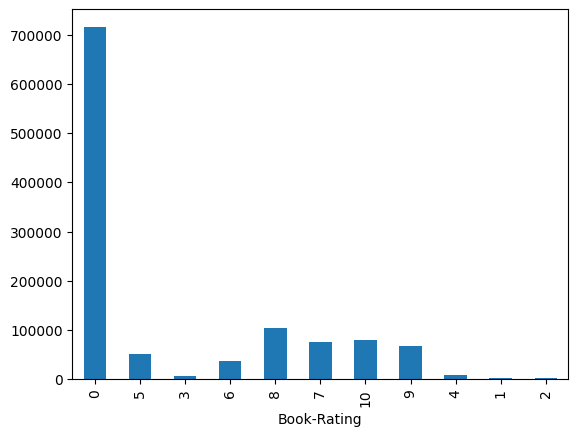

In [17]:
rating['Book-Rating'].value_counts(sort=False).plot(kind='bar')

In [18]:
books.shape

(271360, 8)

In [19]:
user.shape

(278858, 3)

Text(0, 0.5, 'count')

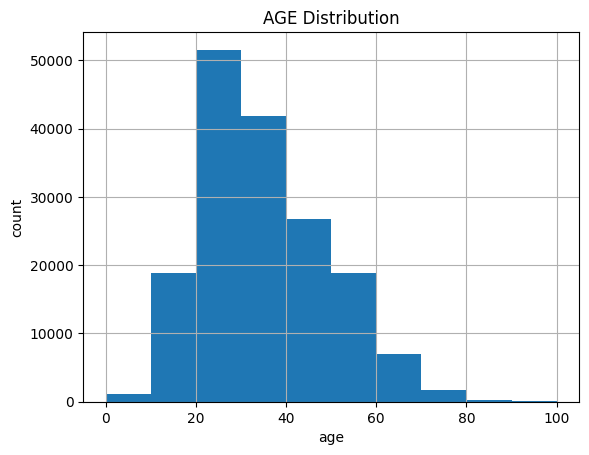

In [20]:
user.Age.hist(bins=range(0,110,10))
plt.title("AGE Distribution")
plt.xlabel('age')
plt.ylabel('count')

## Recommendation Based on Rating Counts

In [21]:
rating_count = pd.DataFrame(rating.groupby(by="ISBN")["Book-Rating"].count()).reset_index()
rating_count.rename(columns={'Book-Rating': 'bookRating'}, inplace=True)

In [22]:
rating_count.sort_values('bookRating',ascending=False).head()

,ISBN,bookRating
247408,0971880107,2502
47371,0316666343,1295
83359,0385504209,883
9637,0060928336,732
41007,0312195516,723


In [23]:
top_5_ISBN = pd.DataFrame(rating_count.sort_values('bookRating', ascending=False).head()["ISBN"])

In [24]:
top_t =pd.merge(left=top_5_ISBN,right=books,how='inner')

In [25]:
top_t

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
1,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
2,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
3,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...
4,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...


## Now, Recommendation based on Correlation

We use Pearsons’R correlation coefficient to measure the linear correlation between two variables, in our case, the ratings for two books.

First, we need to find out the average rating, and the number of ratings each book received.



In [26]:
avg_rating = pd.DataFrame(rating.groupby('ISBN')['Book-Rating'].mean())
avg_rating['ratingCount'] = pd.DataFrame(rating.groupby('ISBN')['Book-Rating'].count())
avg_rating.sort_values('ratingCount',ascending=False).head()

,Book-Rating,ratingCount
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723


Observations: In this data set, the book that received the most rating counts was not highly rated at all. As a result, if we were to use recommendations based on rating counts, we would definitely make mistakes here. So, we need to have a better system.

## To ensure statistical significance, users with less than 200 ratings, and books with less than 100 ratings are excluded.

In [27]:
counts1 = rating['User-ID'].value_counts()
rating = rating[rating['User-ID'].isin(counts1[counts1>=100].index)]

In [28]:
counts = rating['Book-Rating'].value_counts()
rating = rating[rating['Book-Rating'].isin(counts[counts>=100].index)]

In [29]:
rating

,User-ID,ISBN,Book-Rating
412,276925,0006511929,0
413,276925,002542730X,10
414,276925,0060520507,0
415,276925,0060930934,0
416,276925,0060951303,0
...,...,...,...
1149633,276680,1884910033,0
1149634,276680,1888173408,7
1149635,276680,1888173564,8
1149636,276680,1888173572,0


## Rating matrix
We convert the ratings table to a 2D matrix. The matrix will be sparse because not every user rated every book.

In [30]:
ratings_pivot = rating.pivot(index="User-ID", columns="ISBN", values="Book-Rating")
userID = ratings_pivot.index
ISBN = ratings_pivot.columns

In [31]:
ratings_pivot.shape

(1847, 240478)

In [32]:
ratings_pivot.head()

ISBN,0330299891,0375404120,0586045007,9022906116,9032803328,9044922564,9044922572,9044922718,9044923161,904492401X,...,Z380703475,ZR903CX0003,"\0432534220\""""","\2842053052\""""","\8887517452\""""","\8888809228\""""",b00005wz75,cn108465,cn113107,Ô½crosoft
User-ID,,,,,,,,,,,,,,,,,,,,,
183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Handling NaN Values in Recommendation Models

## Matrix Factorization (SVD, ALS) & Neural Networks
- **Best approach:** Keep `NaN`.
- These models **naturally handle missing values** and learn from existing ratings.
- Filling `NaN` with `0` **confuses the model**, making it think the user **gave a negative rating**.

## Distance-Based Models (KNN, Cosine Similarity)
- **Requires numeric values**, so filling `NaN` might be necessary.
- Best approaches:
  - **User-based filling:** Replace `NaN` with the user's **average rating**.
  - **Item-based filling:** Replace `NaN` with the book's **average rating**.
  - **Use `-1` or another placeholder** instead of `0` if the model treats `0` as a real rating.

## Simple Heuristic-Based Methods
- **Filling `NaN` with a reasonable value** might help.
- Example: A rule-based system that **recommends books with the highest average ratings** may work better if missing values are filled.

---

### 🔹 **Key Takeaways**
- **Use `NaN`** for **matrix factorization & deep learning models**.
- **Fill with mean rating** for **KNN & similarity-based models**.
- **Use `-1` instead of `0`** if needed to avoid misinterpretation.

🚀 Choose the best approach based on your recommendation model!


In [33]:
bones_rating = ratings_pivot['0316666343'] #book name is bones
similar_to_bones = ratings_pivot.corrwith(bones_rating)


corr_bones = pd.DataFrame(similar_to_bones,columns=['pearsonR'])
corr_bones.dropna(inplace=True)


corr_summary = corr_bones.join(avg_rating['ratingCount'])

top_similar_books = corr_summary[corr_summary['ratingCount']>=300].sort_values('pearsonR',ascending=False).head(10)

C:\Users\adity\AppData\Roaming\Python\Python312\site-packages\numpy\lib\_function_base_impl.py:3037: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\adity\AppData\Roaming\Python\Python312\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\adity\AppData\Roaming\Python\Python312\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\adity\AppData\Roaming\Python\Python312\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\adity\AppData\Roaming\Python\Python312\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [34]:
top_similar_books

,pearsonR,ratingCount
ISBN,,
0316666343,1.000000,1295
0446672211,0.411417,585
0312291639,0.390961,354
0446610038,0.361089,391
0060930535,0.348839,494
0316601950,0.336298,568
0345342968,0.322280,321
0385265700,0.315475,319
0060934417,0.282490,350


We obtained the books’ ISBNs, but we need to find out the titles of the books to see whether they make sense.

In [35]:
top_similar_books = pd.merge(left=top_similar_books, right=books,how='inner',on="ISBN")

In [36]:
top_similar_books

,ISBN,pearsonR,ratingCount,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0316666343,1.000000,1295,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
1,0446672211,0.411417,585,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998,Warner Books,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...
2,0312291639,0.390961,354,The Nanny Diaries: A Novel,Emma McLaughlin,2003,St. Martin's Griffin,http://images.amazon.com/images/P/0312291639.0...,http://images.amazon.com/images/P/0312291639.0...,http://images.amazon.com/images/P/0312291639.0...
3,0446610038,0.361089,391,1st to Die: A Novel,James Patterson,2002,Warner Vision,http://images.amazon.com/images/P/0446610038.0...,http://images.amazon.com/images/P/0446610038.0...,http://images.amazon.com/images/P/0446610038.0...
4,0060930535,0.348839,494,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...
5,0316601950,0.336298,568,The Pilot's Wife : A Novel,Anita Shreve,1999,Back Bay Books,http://images.amazon.com/images/P/0316601950.0...,http://images.amazon.com/images/P/0316601950.0...,http://images.amazon.com/images/P/0316601950.0...
6,0345342968,0.322280,321,Fahrenheit 451,RAY BRADBURY,1987,Del Rey,http://images.amazon.com/images/P/0345342968.0...,http://images.amazon.com/images/P/0345342968.0...,http://images.amazon.com/images/P/0345342968.0...
7,0385265700,0.315475,319,The Book of Ruth (Oprah's Book Club (Paperback)),Jane Hamilton,1990,Anchor,http://images.amazon.com/images/P/0385265700.0...,http://images.amazon.com/images/P/0385265700.0...,http://images.amazon.com/images/P/0385265700.0...
8,0060934417,0.282490,350,Bel Canto: A Novel,Ann Patchett,2002,Perennial,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...
9,0671021001,0.263316,468,She's Come Undone (Oprah's Book Club),Wally Lamb,1998,Pocket,http://images.amazon.com/images/P/0671021001.0...,http://images.amazon.com/images/P/0671021001.0...,http://images.amazon.com/images/P/0671021001.0...


# Collaborative Filtering Using k-Nearest Neighbors (kNN)
KNN is a machine learning algorithm to find clusters of similar users based on common book ratings, and make predictions using the average rating of top-k nearest neighbors. For example, we first present ratings in a matrix with the matrix having one row for each item (book) and one column for each user.



In [37]:
combine_book_rating = pd.merge(rating,books, on='ISBN')
combine_book_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276925,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1,276925,0060520507,0,"Sushi for Beginners : A Novel (Keyes, Marian)",Marian Keyes,2003,William Morrow,http://images.amazon.com/images/P/0060520507.0...,http://images.amazon.com/images/P/0060520507.0...,http://images.amazon.com/images/P/0060520507.0...
2,276925,0060930934,0,Wasted : A Memoir of Anorexia and Bulimia,Marya Hornbacher,1999,Perennial,http://images.amazon.com/images/P/0060930934.0...,http://images.amazon.com/images/P/0060930934.0...,http://images.amazon.com/images/P/0060930934.0...
3,276925,0060951303,0,La casa de los espÃ­ritus,Isabel Allende,1995,Rayo,http://images.amazon.com/images/P/0060951303.0...,http://images.amazon.com/images/P/0060951303.0...,http://images.amazon.com/images/P/0060951303.0...
4,276925,0140154078,6,The Music of Chance,Paul Auster,1993,Penguin Books,http://images.amazon.com/images/P/0140154078.0...,http://images.amazon.com/images/P/0140154078.0...,http://images.amazon.com/images/P/0140154078.0...


In [38]:
columns = ['Year-Of-Publication', 'Publisher', 'Book-Author', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']
combine_book_rating=combine_book_rating.drop(axis=1, columns=columns)

In [39]:
combine_book_rating

,User-ID,ISBN,Book-Rating,Book-Title
0,276925,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
1,276925,0060520507,0,"Sushi for Beginners : A Novel (Keyes, Marian)"
2,276925,0060930934,0,Wasted : A Memoir of Anorexia and Bulimia
3,276925,0060951303,0,La casa de los espÃ­ritus
4,276925,0140154078,6,The Music of Chance
...,...,...,...,...
606339,276680,1884910033,0,Fiction Writer's Workshop
606340,276680,1888173408,7,Fairy Tale (Common Reader Editions)
606341,276680,1888173564,8,Parnassus on Wheels (Common Reader Editions)
606342,276680,1888173572,0,Haunted Bookshop (Common Reader Editions)


In [40]:
combine_book_rating = combine_book_rating.dropna(axis=0, subset=['Book-Title'])

book_ratingCount = (combine_book_rating.groupby(['Book-Title'])['Book-Rating'].count()
                    .reset_index()
                    .rename(columns={"Book-Rating":"TotalRatingCount"})
                    [['Book-Title','TotalRatingCount']]
                   )

book_ratingCount.head()

,Book-Title,TotalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,3
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [41]:
rating_with_TotalRatingCount = combine_book_rating.merge(book_ratingCount,left_on="Book-Title",right_on="Book-Title",how="left")
rating_with_TotalRatingCount.head()

,User-ID,ISBN,Book-Rating,Book-Title,TotalRatingCount
0,276925,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,105
1,276925,0060520507,0,"Sushi for Beginners : A Novel (Keyes, Marian)",16
2,276925,0060930934,0,Wasted : A Memoir of Anorexia and Bulimia,12
3,276925,0060951303,0,La casa de los espÃ­ritus,8
4,276925,0140154078,6,The Music of Chance,6


In [48]:
popularity_threshold = 50
rating_popular_book = rating_with_TotalRatingCount[rating_with_TotalRatingCount['TotalRatingCount'] >= popularity_threshold]
rating_popular_book.head()

,User-ID,ISBN,Book-Rating,Book-Title,TotalRatingCount
0,276925,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,105
5,276925,0140327592,0,Matilda,79
12,276925,0316666343,0,The Lovely Bones: A Novel,430
15,276925,0385504209,8,The Da Vinci Code,336
37,276925,0804106304,0,The Joy Luck Club,263


In [52]:
rating_popular_book.shape

(100811, 5)

## Filter to User from USA and Canada only

In [63]:
combined = rating_popular_book.merge(user, left_on="User-ID",right_on="User-ID",how="left")
us_canada_user_rating = combined[combined['Location'].str.contains("usa|canada")]
us_canada_user_rating = us_canada_user_rating.drop('Age',axis=1) # as we are not applying similarity based on age
us_canada_user_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title,TotalRatingCount,Location
6,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,105,"gilbert, arizona, usa"
7,277427,0060930535,0,The Poisonwood Bible: A Novel,181,"gilbert, arizona, usa"
8,277427,0060934417,0,Bel Canto: A Novel,147,"gilbert, arizona, usa"
9,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,136,"gilbert, arizona, usa"
10,277427,006440188X,0,The Secret Garden,94,"gilbert, arizona, usa"


## Implementing kNN
We convert our table to a 2D matrix, and fill the missing values with zeros (since we will calculate distances between rating vectors). We then transform the values(ratings) of the matrix dataframe into a scipy sparse matrix for more efficient calculations.

Finding the Nearest Neighbors We use unsupervised algorithms with sklearn.neighbors. The algorithm we use to compute the nearest neighbors is “brute”, and we specify “metric=cosine” so that the algorithm will calculate the cosine similarity between rating vectors. Finally, we fit the model.

In [73]:
from scipy.sparse import csr_matrix

us_canada_user_rating = us_canada_user_rating.drop_duplicates(["User-ID","Book-Title"])
us_canada_user_rating_pivot = us_canada_user_rating.pivot(index="Book-Title",columns="User-ID",values="Book-Rating").fillna(0)
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)

In [74]:
from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(metric = 'cosine', algorithm='brute')
model.fit(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [87]:
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])
print(query_index)
distance,indices = model.kneighbors(us_canada_user_rating_pivot.iloc[query_index,:].values.reshape(1,-1),n_neighbors=6)

881


In [88]:
us_canada_user_rating_pivot.index[query_index]

'The Last Time They Met : A Novel'

In [89]:
for i in range(0,len(distance.flatten())):
    if i==0:
        print(f"Recommendation for {us_canada_user_rating_pivot.index[query_index]}: \n")
    else:
        print(f"{i}:{us_canada_user_rating_pivot.index[indices.flatten()[i]]}, with distance of {distance.flatten()[i]}")

Recommendation for The Last Time They Met : A Novel: 

1:Sea Glass: A Novel, with distance of 0.7288357819857773
2:Border Music, with distance of 0.7601734052735373
3:Summer Light, with distance of 0.7701666147116677
4:Vinegar Hill (Oprah's Book Club (Paperback)), with distance of 0.7783428018958666
5:House of Sand and Fog, with distance of 0.7797134271720189


# Now we will try for all the global users:

In [99]:
combined2 = rating_popular_book.merge(user,left_on="User-ID",right_on="User-ID",how="left")
combined2.drop(columns="Age",axis=1, inplace=True)
combined2

,User-ID,ISBN,Book-Rating,Book-Title,TotalRatingCount,Location
0,276925,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,105,"barcelona, barcelona, spain"
1,276925,0140327592,0,Matilda,79,"barcelona, barcelona, spain"
2,276925,0316666343,0,The Lovely Bones: A Novel,430,"barcelona, barcelona, spain"
3,276925,0385504209,8,The Da Vinci Code,336,"barcelona, barcelona, spain"
4,276925,0804106304,0,The Joy Luck Club,263,"barcelona, barcelona, spain"
...,...,...,...,...,...,...
100806,276680,0688163165,10,Mystic River,168,"hopewell junction, new york, usa"
100807,276680,0743411323,0,Never Change,57,"hopewell junction, new york, usa"
100808,276680,0743422449,0,Mercy,100,"hopewell junction, new york, usa"
100809,276680,0743486226,6,Angels &amp; Demons,266,"hopewell junction, new york, usa"


In [100]:
global_rating = combined2.drop_duplicates(["User-ID","Book-Title"])
global_rating_pivot = global_rating.pivot(index="Book-Title",columns="User-ID",values="Book-Rating").fillna(0)
global_rating_matrix = csr_matrix(global_rating_pivot.values)

In [102]:
model2 = NearestNeighbors(metric = 'cosine', algorithm='brute')
model.fit(global_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [103]:
'''
query_index = np.random.choice(global_rating_pivot.shape[0])
print(query_index)
distance,indices = model.kneighbors(global_rating_pivot.iloc[query_index,:].values.reshape(1,-1),n_neighbors=6)
'''

385


In [107]:
query_index=881

In [108]:
for i in range(0,len(distance.flatten())):
    if i==0:
        print(f"Recommendation for {global_rating_pivot.index[query_index]}: \n")
    else:
        print(f"{i}:{global_rating_pivot.index[indices.flatten()[i]]}, with distance of {distance.flatten()[i]}")

Recommendation for The Last Time They Met : A Novel: 

1:Gone for Good, with distance of 0.8115502701465455
2:The Princess Diaries, with distance of 0.8423280219296918
3:Are You There God?  It's Me, Margaret, with distance of 0.8443609876023521
4:The Murder Book, with distance of 0.8447609025282325
5:Coast Road: A Novel, with distance of 0.8449858822302041


# so it is visible for the same movie there are differnet recommendations for global users and usa and canadian users